In [90]:
import pandas as pd
import numpy as np

import pymc as pm

In [91]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

,Participant,tab_nopic_clicks,list_nopic_clicks,paragraph_nopic_clicks,tab_pic_clicks,list_pic_clicks,paragraph_pic_clicks,sumClicks,avgTime,clicks1,clicks2,time1,time2
0,P1,1,0,0,0,0,0,8.0,8286.555,4.0,4.0,12284.78,4288.33
1,P1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,P1,0,0,1,0,0,0,2.0,2593.900,1.0,1.0,3119.40,2068.40
3,P1,0,0,0,1,0,0,8.0,3336.365,4.0,4.0,12284.78,4288.33
4,P1,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S5,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,S6,1,0,0,0,0,0,3.0,315.400,1.0,2.0,154.40,476.40
97,S6,0,1,0,0,0,0,3.0,172.075,1.0,2.0,184.30,159.85
98,S6,0,0,1,0,0,0,4.0,159.800,1.0,3.0,160.40,159.20


In [92]:
# Create the features and response
X = click_df.loc[:, ['tab_nopic_clicks', 'list_nopic_clicks','paragraph_nopic_clicks','tab_pic_clicks','list_pic_clicks','paragraph_pic_clicks']]
y = click_df.loc[:, 'sumClicks']

In [93]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopetab_nopic_clicks = pm.Normal('slopetab_nopic_clicks', mu = 0, sigma = 10)
    slopelist_nopic_clicks = pm.Normal('slopelist_nopic_clicks', mu = 0, sigma = 10)
    slopeparagraph_nopic_clicks = pm.Normal('slopeparagraph_nopic_clicks', mu = 0, sigma = 10)
    slopetab_pic_clicks = pm.Normal('slopetab_pic_clicks', mu = 0, sigma = 10)
    slopelist_pic_clicks = pm.Normal('slopelist_pic_clicks', mu = 0, sigma = 10)
    slopeparagraph_pic_clicks = pm.Normal('slopeparagraph_pic_clicks', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopetab_nopic_clicks * X.loc[:, 'tab_nopic_clicks'] + slopelist_nopic_clicks * X.loc[:, 'list_nopic_clicks'] + slopeparagraph_nopic_clicks * X.loc[:, 'paragraph_nopic_clicks'] + slopetab_pic_clicks * X.loc[:, 'tab_pic_clicks'] + slopelist_pic_clicks * X.loc[:, 'list_pic_clicks'] + slopeparagraph_pic_clicks * X.loc[:, 'paragraph_pic_clicks']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

C:\Users\Francis\anaconda3\envs\pymc_env\Lib\site-packages\pymc\model\core.py:1317: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopetab_nopic_clicks, slopelist_nopic_clicks, slopeparagraph_nopic_clicks, slopetab_pic_clicks, slopelist_pic_clicks, slopeparagraph_pic_clicks, sigma, Y_obs_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


In [94]:
import matplotlib.pyplot as plt

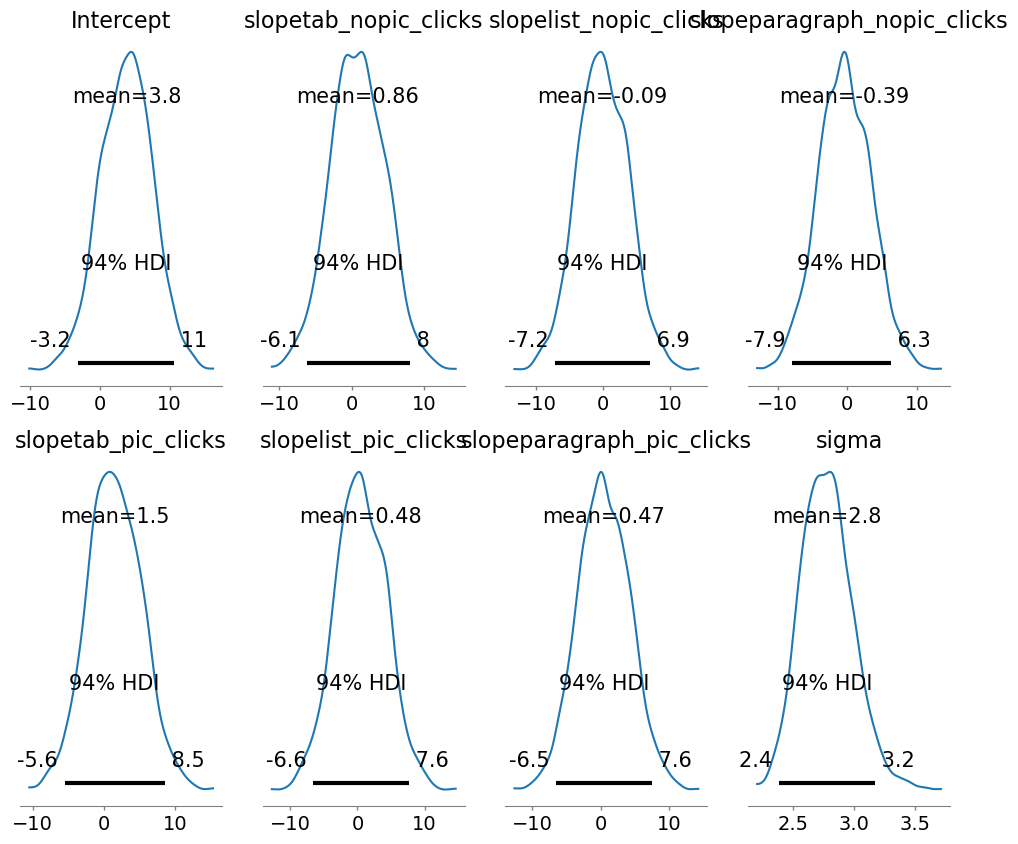

In [95]:
variables_to_plot = ['Intercept', 'slopetab_nopic_clicks', 'slopelist_nopic_clicks',
                     'slopeparagraph_nopic_clicks', 'slopetab_pic_clicks',
                     'slopelist_pic_clicks', 'slopeparagraph_pic_clicks', 'sigma']

pm.plot_posterior(linear_trace, var_names=variables_to_plot, figsize=(12, 10))
plot_data = pm.summary(linear_trace, var_names=variables_to_plot)

In [96]:
variables = ['slopetab_nopic_clicks', 'slopelist_nopic_clicks', 'slopeparagraph_nopic_clicks',
             'slopetab_pic_clicks', 'slopelist_pic_clicks', 'slopeparagraph_pic_clicks']

In [97]:
# y = 3.4 + xi * 1.2 + xi * 0.3 + xi * (-0.011) + xi * 1.9 + xi * 0.85 + xi * 0.86

In [98]:
import itertools

In [99]:
digits = [0, 1]
coefficients = plot_data.loc[variables, "mean"].to_list()
combinations = list(itertools.product(digits, repeat=6))

In [100]:
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [101]:
def calculate_y(combination):
    y = 3.4
    for digit, coeff in zip(combination, coefficients):
        y += int(digit) * coeff
    return y

In [102]:
y_values = [calculate_y(combination) for combination in combinations]

In [103]:
y_values

[3.4,
 3.868,
 3.88,
 4.348,
 4.8919999999999995,
 5.359999999999999,
 5.372,
 5.84,
 3.0149999999999997,
 3.4829999999999997,
 3.4949999999999997,
 3.9629999999999996,
 4.507,
 4.975,
 4.987,
 5.455,
 3.31,
 3.778,
 3.79,
 4.258,
 4.802,
 5.27,
 5.282,
 5.75,
 2.925,
 3.393,
 3.405,
 3.8729999999999998,
 4.417,
 4.885,
 4.897,
 5.365,
 4.261,
 4.729,
 4.741,
 5.209,
 5.753,
 6.221,
 6.2330000000000005,
 6.7010000000000005,
 3.8760000000000003,
 4.344,
 4.356,
 4.824,
 5.368,
 5.836,
 5.848000000000001,
 6.316000000000001,
 4.171,
 4.639,
 4.651,
 5.119,
 5.663,
 6.131,
 6.143000000000001,
 6.611000000000001,
 3.7860000000000005,
 4.2540000000000004,
 4.266,
 4.734,
 5.2780000000000005,
 5.746,
 5.758000000000001,
 6.226000000000001]

In [104]:
values_df = pd.DataFrame(combinations, columns=variables)
values_df['Concatenated_Variables'] = values_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
values_df['y_values'] = y_values

In [105]:
values_df

,slopetab_nopic_clicks,slopelist_nopic_clicks,slopeparagraph_nopic_clicks,slopetab_pic_clicks,slopelist_pic_clicks,slopeparagraph_pic_clicks,Concatenated_Variables,y_values
0,0,0,0,0,0,0,000000,3.400
1,0,0,0,0,0,1,000001,3.868
2,0,0,0,0,1,0,000010,3.880
3,0,0,0,0,1,1,000011,4.348
4,0,0,0,1,0,0,000100,4.892
...,...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,111011,4.734
60,1,1,1,1,0,0,111100,5.278
61,1,1,1,1,0,1,111101,5.746
62,1,1,1,1,1,0,111110,5.758


In [106]:
import matplotlib.pyplot as plt

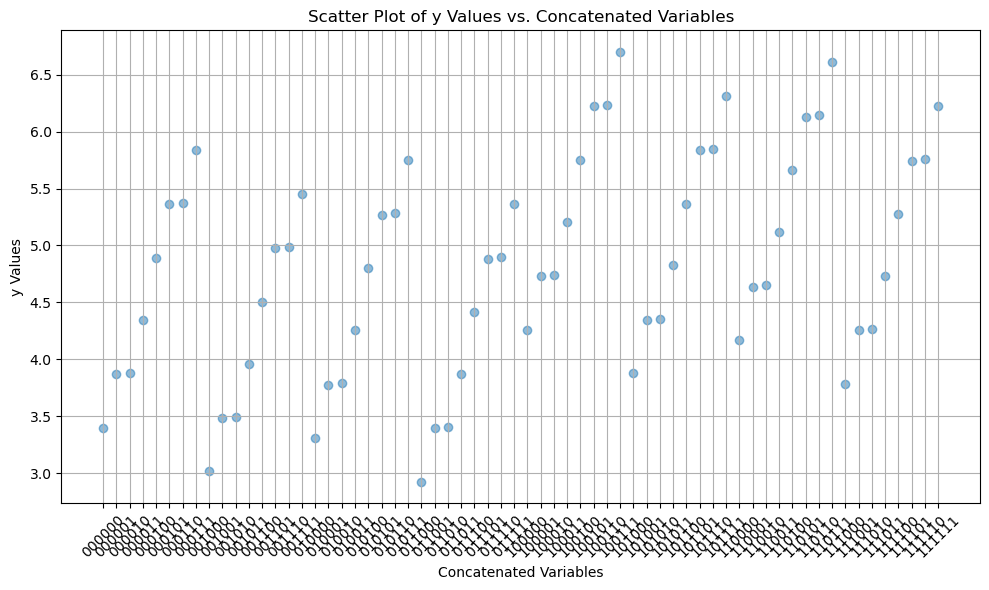

In [107]:
# Scatter plot of y values vs. concatenated variables
plt.figure(figsize=(10, 6))
plt.scatter(values_df['Concatenated_Variables'], values_df['y_values'], alpha=0.5)
plt.xlabel('Concatenated Variables')
plt.ylabel('y Values')
plt.title('Scatter Plot of y Values vs. Concatenated Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


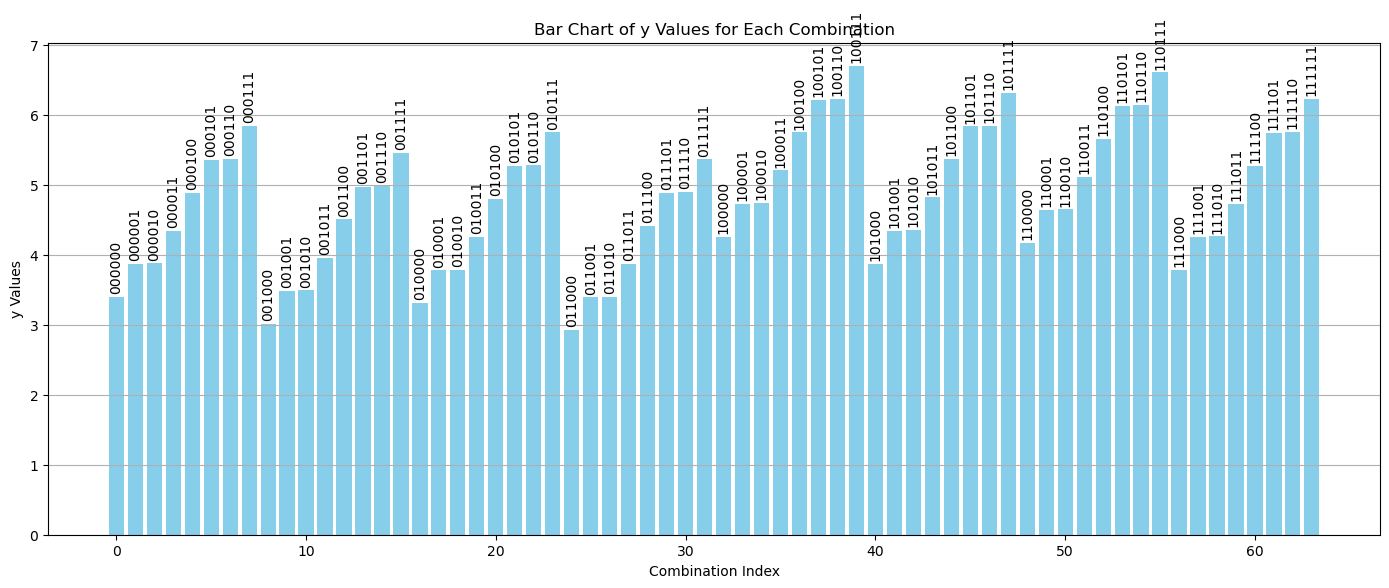

In [108]:
# Sort the DataFrame by concatenated variables
sorted_df = values_df.sort_values(by='Concatenated_Variables')

# Bar chart of y values for each combination with annotations
plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_df.index, sorted_df['y_values'], color='skyblue')

# Annotate each bar with its concatenated variables
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             sorted_df['Concatenated_Variables'].iloc[i], 
             ha='center', va='bottom', rotation=90)

plt.xlabel('Combination Index')
plt.ylabel('y Values')
plt.title('Bar Chart of y Values for Each Combination')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [109]:
plot_data # data of the posterior distribution

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,3.809,3.721,-3.240,10.626,0.111,0.079,1121.0,1661.0,1.0
slopetab_nopic_clicks,0.861,3.781,-6.128,8.045,0.112,0.079,1145.0,1652.0,1.0
slopelist_nopic_clicks,-0.090,3.771,-7.156,6.945,0.111,0.079,1145.0,1730.0,1.0
slopeparagraph_nopic_clicks,-0.385,3.782,-7.905,6.313,0.112,0.080,1133.0,1741.0,1.0
slopetab_pic_clicks,1.492,3.755,-5.554,8.510,0.112,0.079,1128.0,1730.0,1.0
slopelist_pic_clicks,0.480,3.766,-6.622,7.631,0.112,0.079,1142.0,1685.0,1.0
slopeparagraph_pic_clicks,0.468,3.781,-6.506,7.568,0.113,0.080,1117.0,1593.0,1.0
sigma,2.779,0.213,2.385,3.171,0.004,0.003,3148.0,2863.0,1.0


In [110]:
plot_data.to_csv("clicks_findings.csv") # turning it to csv for clicks / time processing